<a href="https://colab.research.google.com/github/willywildan/SupplyChain/blob/main/Supply_Chain_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


source data: https://www.kaggle.com/prashantk93/supply-chain-management-for-car

In [84]:
dataset = pd.read_csv("/content/drive/My Drive/crisbar/Car_SupplyChainManagementDataSet.csv", header= 0,encoding= 'unicode_escape', index_col='OrderDate', parse_dates=True) # Import dataset menggunakan pandas
dataset.head(5) # Check 5 baris pada dataset

,SupplierID,SupplierAddress,SupplierName,SupplierContactDetails,ProductID,CarMaker,CarModel,CarColor,CarModelYear,CarPrice,CustomerID,CustomerName,Gender,JobTitle,PhoneNumber,EmailAddress,City,Country,CountryCode,State,CustomerAddress,OrderID,ShipDate,ShipMode,Shipping,PostalCode,Sales,Quantity,Discount,CreditCardType,CreditCard,CustomerFeedback
OrderDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-16,1,542 Dayton Center,Bubbletube,871-57-6028,8893,Dodge,Ram 2500,Goldenrod,2007,521963.45,60760-224,Louie Hinsche,Male,Mechanical Systems Engineer,907-966-3323,lhinsche0@comcast.net,Anchorage,United States,US,Alaska,1 Independence Circle,0268-6694,2019/03/14,Standard Class,Truck,99522,744796.41,1,0.83,diners-club-carte-blanche,30408016042565,Bad
2019-02-13,2,0674 Springview Circle,Tagopia,337-64-4060,9444,Toyota,Tundra,Crimson,2010,672222.04,67457-594,Alexandros Manuel,Male,Structural Engineer,320-943-9301,amanuel1@usnews.com,Saint Cloud,United States,US,Minnesota,209 Lerdahl Alley,0699-5728,2019/03/06,Standard Class,Truck,56398,794773.17,1,0.79,jcb,3549221112237767,Good
2018-08-16,3,70 Autumn Leaf Center,Zoomdog,218-19-1802,253,GMC,Savana 1500,Crimson,2011,504465.72,58411-135,Alvie Weighell,Male,Systems Administrator III,312-561-8337,aweighell2@nature.com,Chicago,United States,US,Illinois,1803 Evergreen Trail,42043-251,2019/01/20,Second Class,Air,60674,968244.90,1,0.28,jcb,3557159608180902,Okay
2019-02-22,4,649 Corben Lane,Oozz,635-15-3112,1283,Volkswagen,Cabriolet,Fuscia,1990,646077.11,0591-5307,Flint Gunston,Male,Operator,407-830-3175,fgunston3@mozilla.org,Orlando,United States,US,Florida,9682 Warbler Terrace,57520-1044,2019/03/16,First Class,Truck,32885,942213.82,2,0.76,jcb,3529909223663921,Very Bad
2018-09-06,5,94 Namekagon Point,Kare,849-23-6788,8905,Mercury,Mariner,Teal,2009,699890.24,51655-189,Alyssa Filpi,Female,Software Engineer III,313-870-7247,afilpi4@webs.com,Detroit,United States,US,Michigan,5751 Tony Avenue,36987-3308,2019/01/29,Second Class,Air,48232,879519.57,1,0.50,china-unionpay,5602235978541517,Bad


In [85]:
dataset.shape

(1000, 32)

In [86]:
dataset.duplicated().sum()

0

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2018-12-16 to 2018-08-28
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SupplierID              1000 non-null   int64  
 1   SupplierAddress         1000 non-null   object 
 2   SupplierName            1000 non-null   object 
 3   SupplierContactDetails  1000 non-null   object 
 4   ProductID               1000 non-null   int64  
 5   CarMaker                1000 non-null   object 
 6   CarModel                1000 non-null   object 
 7   CarColor                1000 non-null   object 
 8   CarModelYear            1000 non-null   int64  
 9   CarPrice                1000 non-null   float64
 10  CustomerID              1000 non-null   object 
 11  CustomerName            1000 non-null   object 
 12  Gender                  1000 non-null   object 
 13  JobTitle                1000 non-null   object 
 14  PhoneNumber           

In [88]:
#check missing values
dataset.isna().sum() 

SupplierID                0
SupplierAddress           0
SupplierName              0
SupplierContactDetails    0
ProductID                 0
CarMaker                  0
CarModel                  0
CarColor                  0
CarModelYear              0
CarPrice                  0
CustomerID                0
CustomerName              0
Gender                    0
JobTitle                  0
PhoneNumber               0
EmailAddress              0
City                      0
Country                   0
CountryCode               0
State                     0
CustomerAddress           0
OrderID                   0
ShipDate                  0
ShipMode                  0
Shipping                  0
PostalCode                0
Sales                     0
Quantity                  0
Discount                  0
CreditCardType            0
CreditCard                0
CustomerFeedback          0
dtype: int64

In [89]:
dataset.head()

,SupplierID,SupplierAddress,SupplierName,SupplierContactDetails,ProductID,CarMaker,CarModel,CarColor,CarModelYear,CarPrice,CustomerID,CustomerName,Gender,JobTitle,PhoneNumber,EmailAddress,City,Country,CountryCode,State,CustomerAddress,OrderID,ShipDate,ShipMode,Shipping,PostalCode,Sales,Quantity,Discount,CreditCardType,CreditCard,CustomerFeedback
OrderDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-16,1,542 Dayton Center,Bubbletube,871-57-6028,8893,Dodge,Ram 2500,Goldenrod,2007,521963.45,60760-224,Louie Hinsche,Male,Mechanical Systems Engineer,907-966-3323,lhinsche0@comcast.net,Anchorage,United States,US,Alaska,1 Independence Circle,0268-6694,2019/03/14,Standard Class,Truck,99522,744796.41,1,0.83,diners-club-carte-blanche,30408016042565,Bad
2019-02-13,2,0674 Springview Circle,Tagopia,337-64-4060,9444,Toyota,Tundra,Crimson,2010,672222.04,67457-594,Alexandros Manuel,Male,Structural Engineer,320-943-9301,amanuel1@usnews.com,Saint Cloud,United States,US,Minnesota,209 Lerdahl Alley,0699-5728,2019/03/06,Standard Class,Truck,56398,794773.17,1,0.79,jcb,3549221112237767,Good
2018-08-16,3,70 Autumn Leaf Center,Zoomdog,218-19-1802,253,GMC,Savana 1500,Crimson,2011,504465.72,58411-135,Alvie Weighell,Male,Systems Administrator III,312-561-8337,aweighell2@nature.com,Chicago,United States,US,Illinois,1803 Evergreen Trail,42043-251,2019/01/20,Second Class,Air,60674,968244.90,1,0.28,jcb,3557159608180902,Okay
2019-02-22,4,649 Corben Lane,Oozz,635-15-3112,1283,Volkswagen,Cabriolet,Fuscia,1990,646077.11,0591-5307,Flint Gunston,Male,Operator,407-830-3175,fgunston3@mozilla.org,Orlando,United States,US,Florida,9682 Warbler Terrace,57520-1044,2019/03/16,First Class,Truck,32885,942213.82,2,0.76,jcb,3529909223663921,Very Bad
2018-09-06,5,94 Namekagon Point,Kare,849-23-6788,8905,Mercury,Mariner,Teal,2009,699890.24,51655-189,Alyssa Filpi,Female,Software Engineer III,313-870-7247,afilpi4@webs.com,Detroit,United States,US,Michigan,5751 Tony Avenue,36987-3308,2019/01/29,Second Class,Air,48232,879519.57,1,0.50,china-unionpay,5602235978541517,Bad


In [90]:
#Menghilangkan kolom yang tidak diperlukan
data = dataset.drop(['SupplierAddress','SupplierContactDetails','PhoneNumber','EmailAddress','Country','CountryCode','CustomerAddress','PostalCode','CreditCard'],axis=1)
data.shape

(1000, 23)

In [91]:
data.head()

,SupplierID,SupplierName,ProductID,CarMaker,CarModel,CarColor,CarModelYear,CarPrice,CustomerID,CustomerName,Gender,JobTitle,City,State,OrderID,ShipDate,ShipMode,Shipping,Sales,Quantity,Discount,CreditCardType,CustomerFeedback
OrderDate,,,,,,,,,,,,,,,,,,,,,,,
2018-12-16,1,Bubbletube,8893,Dodge,Ram 2500,Goldenrod,2007,521963.45,60760-224,Louie Hinsche,Male,Mechanical Systems Engineer,Anchorage,Alaska,0268-6694,2019/03/14,Standard Class,Truck,744796.41,1,0.83,diners-club-carte-blanche,Bad
2019-02-13,2,Tagopia,9444,Toyota,Tundra,Crimson,2010,672222.04,67457-594,Alexandros Manuel,Male,Structural Engineer,Saint Cloud,Minnesota,0699-5728,2019/03/06,Standard Class,Truck,794773.17,1,0.79,jcb,Good
2018-08-16,3,Zoomdog,253,GMC,Savana 1500,Crimson,2011,504465.72,58411-135,Alvie Weighell,Male,Systems Administrator III,Chicago,Illinois,42043-251,2019/01/20,Second Class,Air,968244.90,1,0.28,jcb,Okay
2019-02-22,4,Oozz,1283,Volkswagen,Cabriolet,Fuscia,1990,646077.11,0591-5307,Flint Gunston,Male,Operator,Orlando,Florida,57520-1044,2019/03/16,First Class,Truck,942213.82,2,0.76,jcb,Very Bad
2018-09-06,5,Kare,8905,Mercury,Mariner,Teal,2009,699890.24,51655-189,Alyssa Filpi,Female,Software Engineer III,Detroit,Michigan,36987-3308,2019/01/29,Second Class,Air,879519.57,1,0.50,china-unionpay,Bad


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


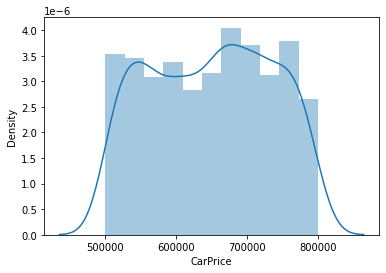

In [92]:
sns.distplot(data['CarPrice'])

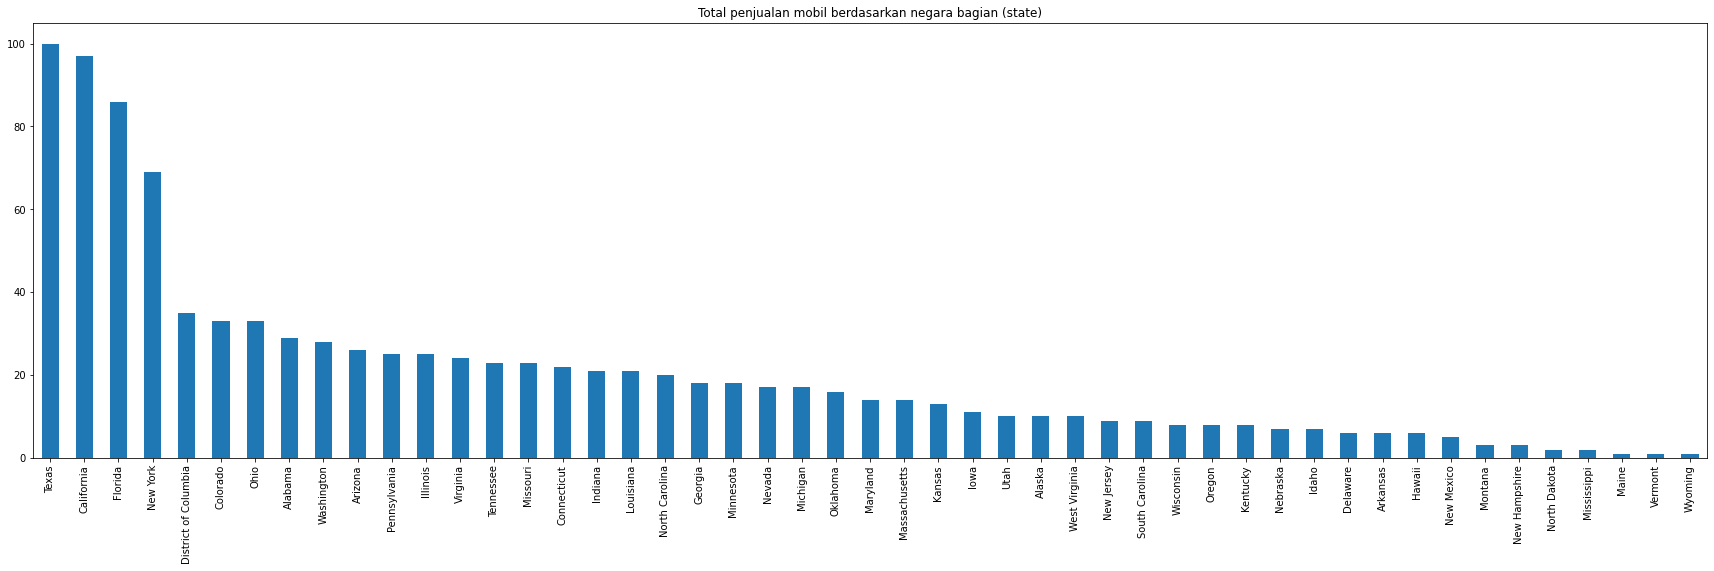

In [93]:
data['State'].value_counts().plot.bar(figsize=(30,8), title= "Total penjualan mobil berdasarkan negara bagian (state)")

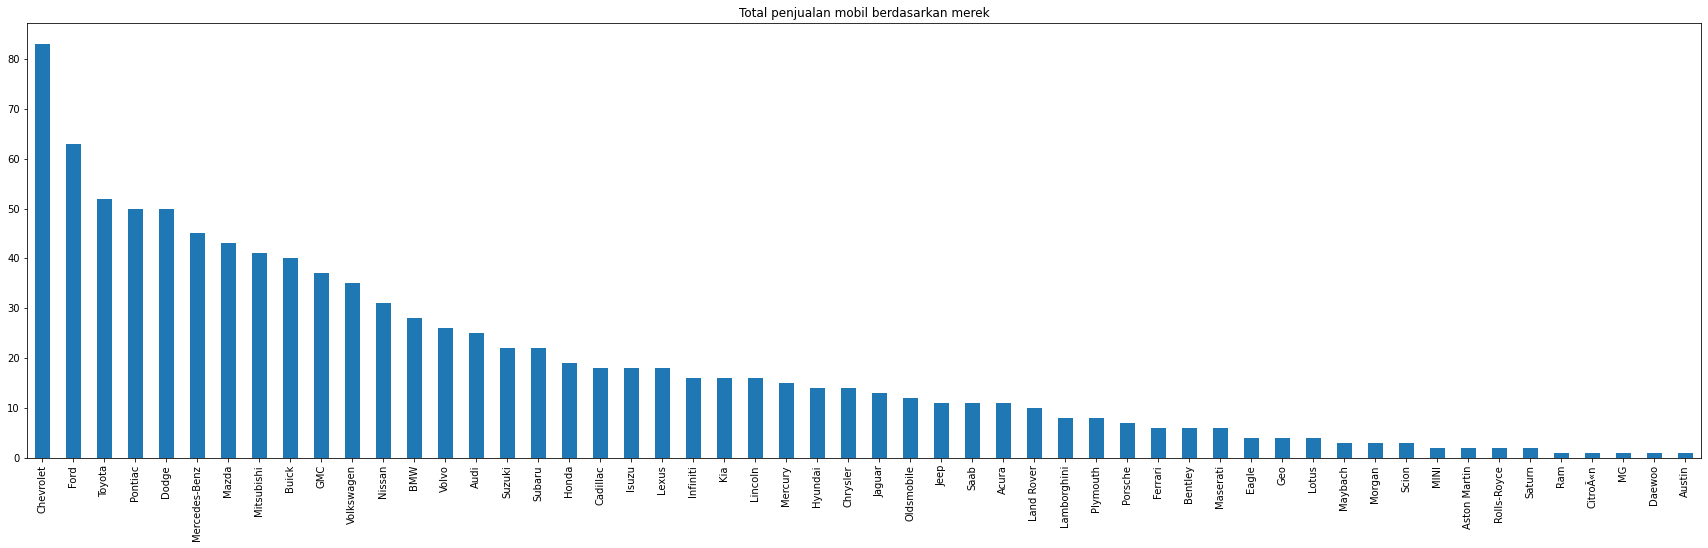

In [94]:
data['CarMaker'].value_counts().plot.bar(figsize=(30,8), title= "Total penjualan mobil berdasarkan merek")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


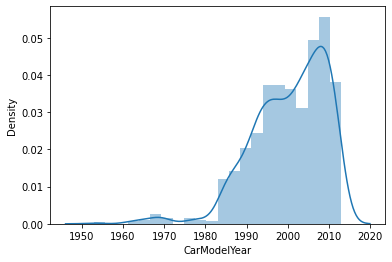

In [95]:
sns.distplot(data['CarModelYear'])

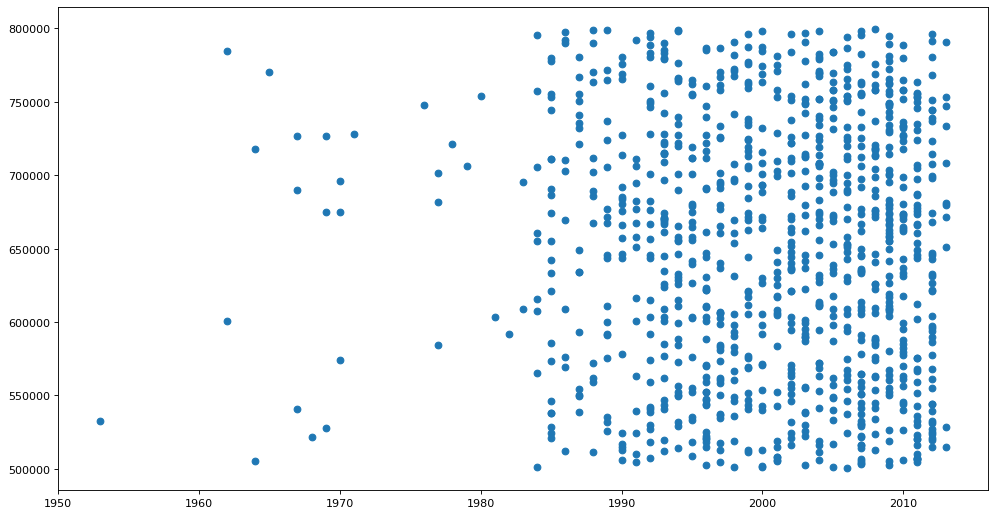

In [96]:
plt.figure(figsize=(15, 8), dpi=80)
plt.scatter(x=data['CarModelYear'],y=data['CarPrice'])
plt.show()

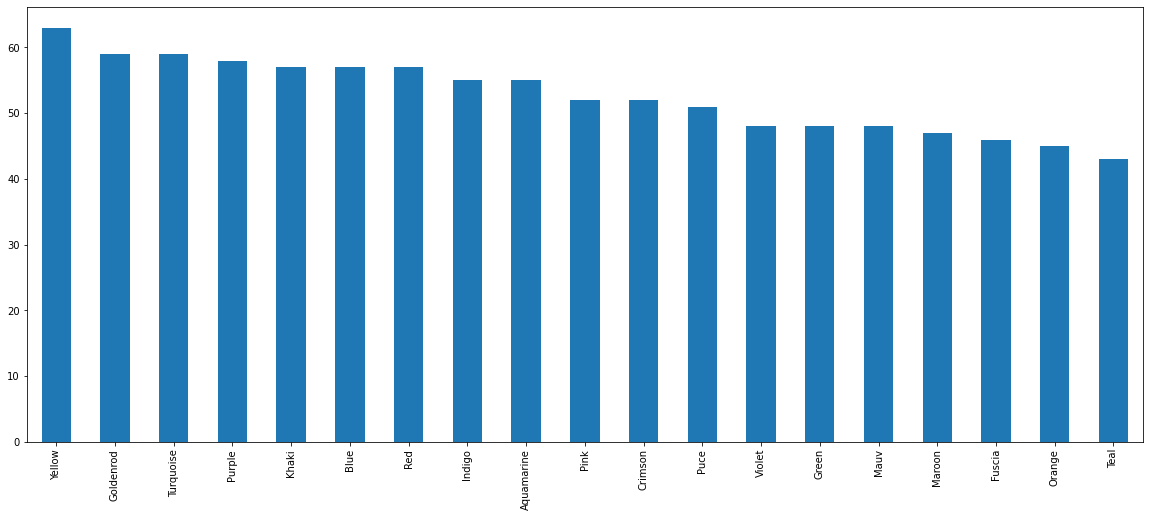

In [97]:
data['CarColor'].value_counts().plot.bar(figsize=(20,8), title= "Total penjualan mobil berdasarkan warna")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


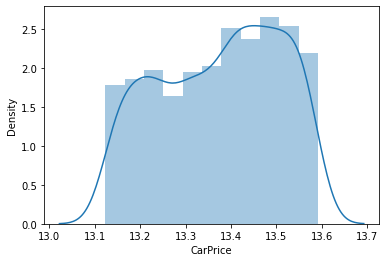

In [98]:
sns.distplot(np.log(data['CarPrice']))

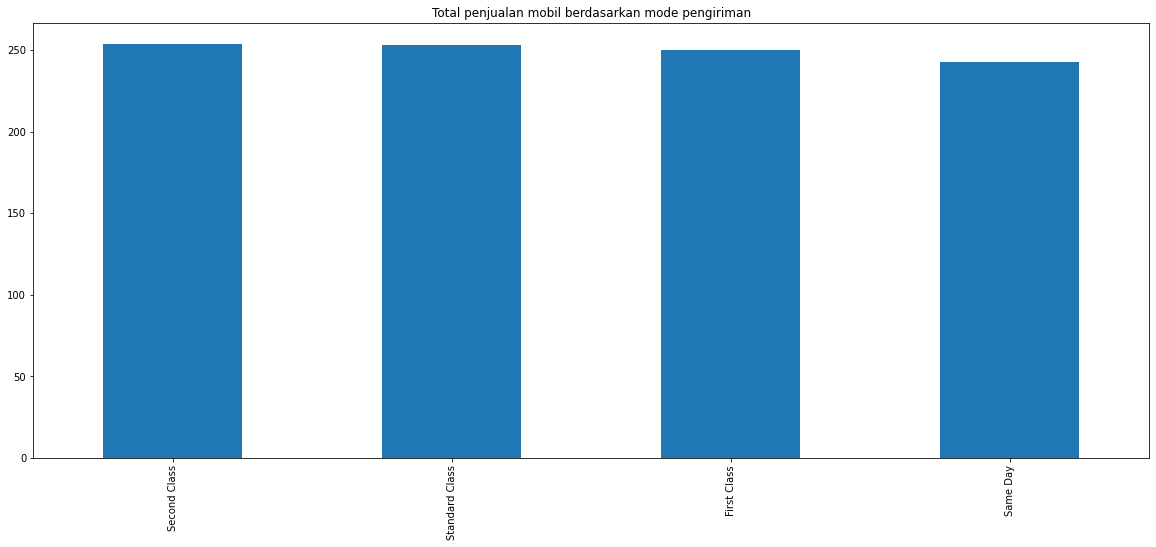

In [99]:
data['ShipMode'].value_counts().plot.bar(figsize=(20,8), title= "Total penjualan mobil berdasarkan mode pengiriman")

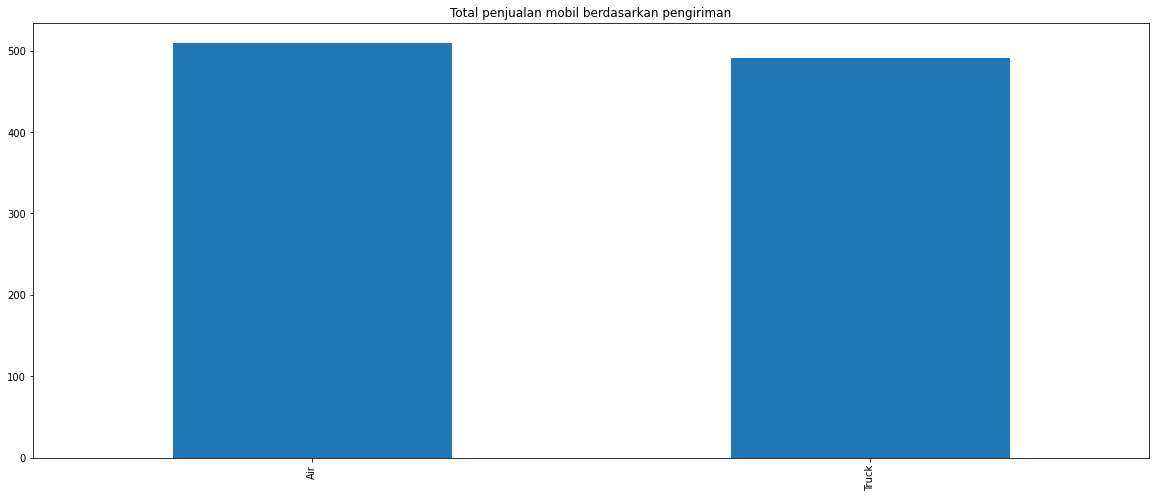

In [100]:
data['Shipping'].value_counts().plot.bar(figsize=(20,8), title= "Total penjualan mobil berdasarkan pengiriman")

In [101]:
data['CustomerFeedback'].unique()

array(['Bad', 'Good', 'Okay', 'Very Bad', 'Very Good'], dtype=object)

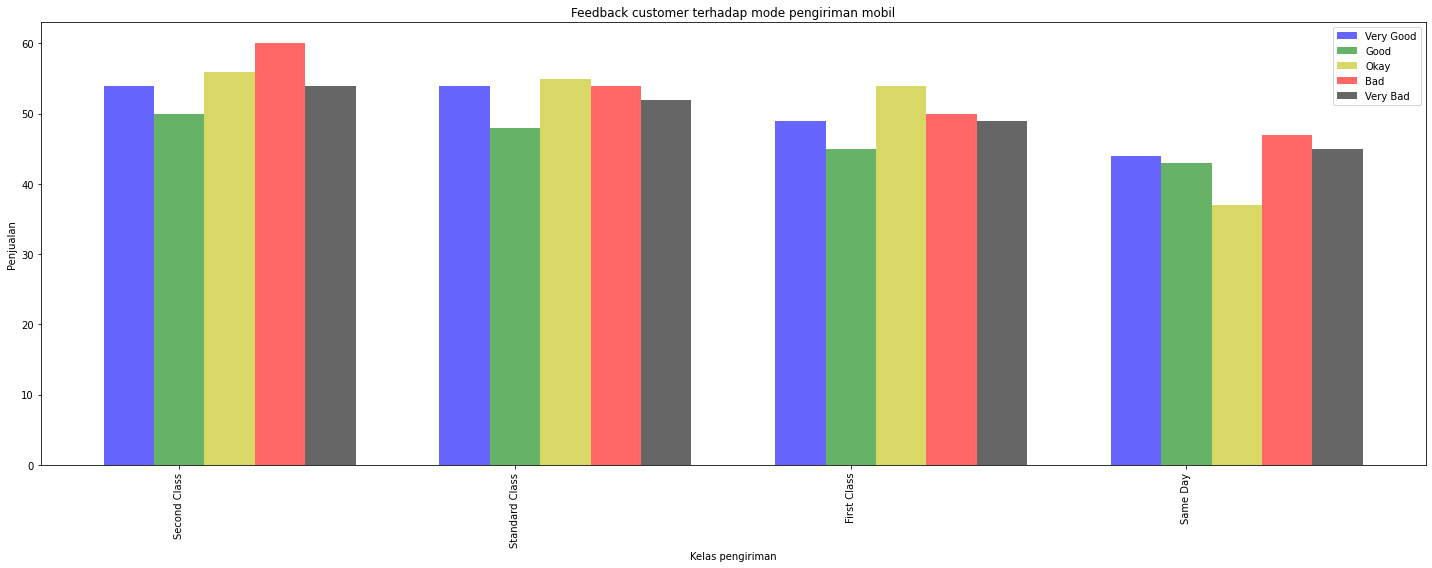

In [102]:
vgood = data[(data['CustomerFeedback'] == 'Very Good')]
good = data[(data['CustomerFeedback'] == 'Good')]
okay = data[(data['CustomerFeedback'] == 'Okay')]
bad = data[(data['CustomerFeedback'] == 'Bad')]
vbad = data[(data['CustomerFeedback'] == 'Very Bad')]
count1 = vgood['ShipMode'].value_counts()
count2 = good['ShipMode'].value_counts()
count3 = okay['ShipMode'].value_counts()
count4 = bad['ShipMode'].value_counts()
count5 = vbad['ShipMode'].value_counts()
names=data['ShipMode'].value_counts().keys()
n_groups=4
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.15
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Very Good')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='g',label='Good')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='y',label='Okay')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='r',label='Bad')
type5=plt.bar(index+bar_width+bar_width+bar_width+bar_width,count5,bar_width,alpha=opacity,color='k',label='Very Bad')
plt.xlabel('Kelas pengiriman')
plt.ylabel('Penjualan')
plt.title('Feedback customer terhadap mode pengiriman mobil')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

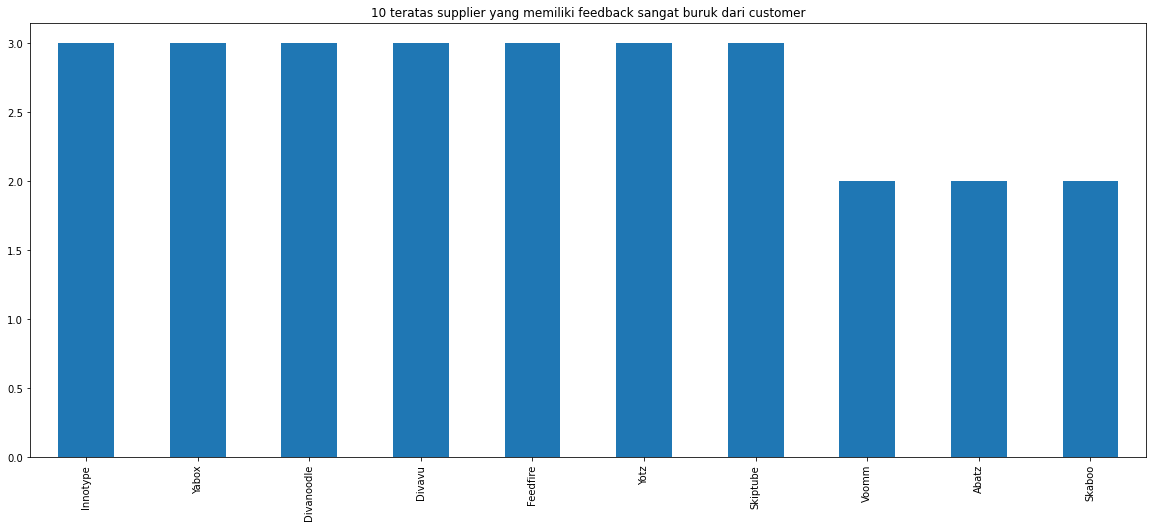

In [126]:
feedback = data[(data['CustomerFeedback'] == 'Very Bad')]
feedback['SupplierName'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title = "10 teratas supplier yang memiliki feedback sangat buruk dari customer")